In [47]:
import pandas as pd
import numpy as np
import requests
import os
import re
import csv

import sklearn

In [48]:
df_o = pd.read_csv('/content/drive/MyDrive/fyp/fyp2/scores/manual_label_Gold_cleaned_withScores.csv.csv')
display(df_o)
real_score_name = 'real_score'

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,index,date,tweet,is_retweet,real_score,afinn_score,vader_score,textblob_score,flair_label,flair_conf,xlm_model_score,xlm_model_label,xlm_model_conf
0,0,0,0,0,2021-11-18 19:52:08,🔥🔥🔥 ANOTHER MASSIVE WIN! 🔥🔥🔥\n\nLUNA/USD Take-...,False,1.00,0.40,0.9551,0.250000,1,0.989108,1,Positive,0.633348
1,1,1,1,1,2021-10-23 09:37:54,&gt;There is no inflation\n&gt;There is some i...,False,0.00,0.05,0.7469,0.050000,-1,0.999028,1,Positive,0.855238
2,2,2,2,2,2022-04-19 04:12:41,China’s largest broadcaster’s NFT series becom...,False,0.00,0.00,0.0000,0.000000,-1,0.986025,1,Positive,0.546211
3,3,3,3,3,2021-05-29 22:54:12,❗Bee Network-Cloud Mining on Your Phone ❗☁️⛏️💰...,False,0.00,0.05,0.2263,0.450000,-1,0.670291,0,Neutral,0.948477
4,4,4,4,4,2022-03-18 21:04:16,"Have you heard of $PIT, one of the largest com...",False,0.25,0.00,0.0000,0.000000,-1,0.999827,0,Neutral,0.818441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,293,295,295,295,2022-01-12 09:21:10,NFT news.\n\nKakao Entertainment to expand its...,False,0.00,0.05,0.6249,0.000000,1,0.669401,0,Neutral,0.743689
294,294,296,296,296,2021-04-24 12:24:23,Crypto mining as it should be! \n\nZionodes pr...,False,0.00,0.25,0.6900,0.375000,1,0.997980,0,Neutral,0.938465
295,295,297,297,297,2021-07-21 04:19:31,"The state now has 1,350 active locally-acquire...",False,0.00,0.20,0.7650,-0.044444,1,0.836142,0,Neutral,0.825222
296,296,298,298,298,2021-10-19 17:25:28,What’s amazing it’s not just for the rich and ...,False,0.25,0.40,0.8934,0.195000,1,0.997440,1,Positive,0.508493


In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = df_o.copy()
df.dropna(inplace = True)

def balance_dataset(df,real_score_name):
  df_pos = df[df[real_score_name] > 0].sample(frac=1).reset_index(drop=True)
  df_neg = df[df[real_score_name] < 0].sample(frac=1).reset_index(drop=True)
  df_neu = df[df[real_score_name] == 0].sample(frac=1).reset_index(drop=True)

  pos = df_pos.shape[0]
  a = pos

  neg = df_neg.shape[0]
  b = neg

  neu = df_neu.shape[0]
  c = neu

  if a < b and a < c :
    smallest = a
  if b < a and b < c :
    smallest = b
  if c < a and c < b :
    smallest = c

  df_pos = df_pos[:smallest]
  df_neg = df_neg[:smallest]
  df_neu = df_neu[:smallest]
  
  df_out = df_pos.append(df_neg, ignore_index=True)
  df_out = df_out.append(df_neu, ignore_index=True)
  return df_out




def eval(df_true,df_pred,name):

  def convert_score_to_sent(sent_score):
    if sent_score > 0:
      return 'positive'
    elif sent_score < 0:
      return 'negative'
    elif sent_score == 0:
      return 'neutral'
    else:
      print("error")
      return np.nan

  def get_sentiment(sent_scores):
    sent_out = []
    for score in sent_scores:
      sent_out.append(convert_score_to_sent(score))
    return sent_out

  pred = get_sentiment(df_pred)
  true = get_sentiment(df_true)
  print(type(pred))
  print(type(true))
  cm = confusion_matrix( true, pred , labels=['negative','neutral','positive'])
  #plot_confusion_matrix(X = pred,y_true = true)
  #print(mat)

  cm_df = pd.DataFrame(cm,
                      index = ['negative','neutral','positive'], 
                      columns = ['negative','neutral','positive'])

  plt.figure(figsize=(5,4))

  sns.heatmap(cm_df, annot=True)
  plt.title('Confusion Matrix for {}'.format(name))
  plt.ylabel('Actal Values')
  plt.xlabel('Predicted Values')
  plt.show()

  report = sklearn.metrics.classification_report(true,pred,labels=['negative','neutral','positive'])
  accuracy = sklearn.metrics.accuracy_score(true, pred,normalize=True, sample_weight=None)
  print(report)
  print("accuracy is" ,accuracy)
  return report,cm





In [50]:
df = balance_dataset(df,real_score_name)
display(df)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,index,date,tweet,is_retweet,real_score,afinn_score,vader_score,textblob_score,flair_label,flair_conf,xlm_model_score,xlm_model_label,xlm_model_conf
0,168,169,169,169,2021-11-19 20:09:39,Bitcoin will save America 🔥🚀,False,0.50,0.10,0.2023,0.000000,1,0.875378,1,Positive,0.882977
1,257,259,259,259,2022-01-13 00:00:40,"Today's Bitcoin price is $43,982 +2.73% from y...",False,1.00,0.00,0.0000,0.000000,-1,0.505618,1,Positive,0.861938
2,262,264,264,264,2021-02-13 18:44:31,FreeBitcoin Bitcoin BTC Bitcoinmining ElonMus...,False,0.25,0.00,0.2960,0.600000,-1,0.737742,0,Neutral,0.903971
3,123,123,123,123,2021-05-26 11:30:33,"Bitcoin reclaims $40,000 as crypto volatility ...",False,1.00,0.00,0.0000,0.000000,1,0.606264,1,Positive,0.932037
4,41,41,41,41,2021-04-18 02:46:30,Vertex Market P2P trading platform with low fe...,False,0.25,0.05,0.6486,0.200000,1,0.860994,0,Neutral,0.942636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,226,227,227,227,2022-06-03 21:30:42,He plants the Bitcoin garden AND keeps it free...,False,0.00,0.05,0.5106,0.400000,1,0.999876,0,Neutral,0.624482
101,264,266,266,266,2022-03-20 07:24:45,Speculation\n\nCrypto will be first adapted by...,False,0.00,0.20,0.5994,0.264286,-1,0.972365,1,Positive,0.572579
102,159,160,160,160,2021-10-28 02:48:52,It is DCA Wednesday!!! DollarCostAverage DCA ...,False,0.00,0.00,0.0000,0.000000,-1,0.998012,0,Neutral,0.836802
103,224,225,225,225,2022-03-24 08:19:47,"1428563 bytes, 1951 transactions, 6.31287478BT...",False,0.00,0.10,0.5719,0.500000,1,0.522831,1,Positive,0.597414


<class 'list'>
<class 'list'>


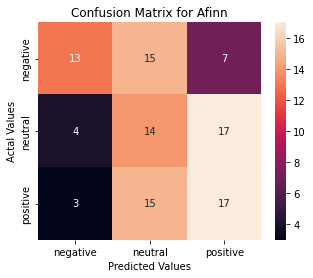

              precision    recall  f1-score   support

    negative       0.65      0.37      0.47        35
     neutral       0.32      0.40      0.35        35
    positive       0.41      0.49      0.45        35

    accuracy                           0.42       105
   macro avg       0.46      0.42      0.42       105
weighted avg       0.46      0.42      0.42       105

accuracy is 0.41904761904761906


('              precision    recall  f1-score   support\n\n    negative       0.65      0.37      0.47        35\n     neutral       0.32      0.40      0.35        35\n    positive       0.41      0.49      0.45        35\n\n    accuracy                           0.42       105\n   macro avg       0.46      0.42      0.42       105\nweighted avg       0.46      0.42      0.42       105\n',
 array([[13, 15,  7],
        [ 4, 14, 17],
        [ 3, 15, 17]]))

In [51]:
eval(df[real_score_name],df['afinn_score'],'Afinn')

<class 'list'>
<class 'list'>


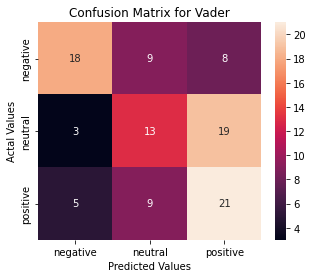

              precision    recall  f1-score   support

    negative       0.69      0.51      0.59        35
     neutral       0.42      0.37      0.39        35
    positive       0.44      0.60      0.51        35

    accuracy                           0.50       105
   macro avg       0.52      0.50      0.50       105
weighted avg       0.52      0.50      0.50       105

accuracy is 0.49523809523809526


('              precision    recall  f1-score   support\n\n    negative       0.69      0.51      0.59        35\n     neutral       0.42      0.37      0.39        35\n    positive       0.44      0.60      0.51        35\n\n    accuracy                           0.50       105\n   macro avg       0.52      0.50      0.50       105\nweighted avg       0.52      0.50      0.50       105\n',
 array([[18,  9,  8],
        [ 3, 13, 19],
        [ 5,  9, 21]]))

In [52]:
eval(df[real_score_name],df['vader_score'],'Vader')

<class 'list'>
<class 'list'>


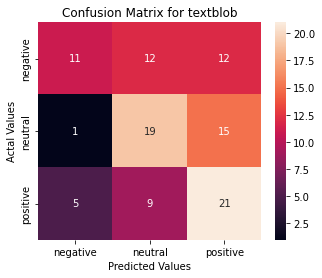

              precision    recall  f1-score   support

    negative       0.65      0.31      0.42        35
     neutral       0.47      0.54      0.51        35
    positive       0.44      0.60      0.51        35

    accuracy                           0.49       105
   macro avg       0.52      0.49      0.48       105
weighted avg       0.52      0.49      0.48       105

accuracy is 0.4857142857142857


('              precision    recall  f1-score   support\n\n    negative       0.65      0.31      0.42        35\n     neutral       0.47      0.54      0.51        35\n    positive       0.44      0.60      0.51        35\n\n    accuracy                           0.49       105\n   macro avg       0.52      0.49      0.48       105\nweighted avg       0.52      0.49      0.48       105\n',
 array([[11, 12, 12],
        [ 1, 19, 15],
        [ 5,  9, 21]]))

In [53]:
eval(df[real_score_name],df['textblob_score'],'textblob')

<class 'list'>
<class 'list'>


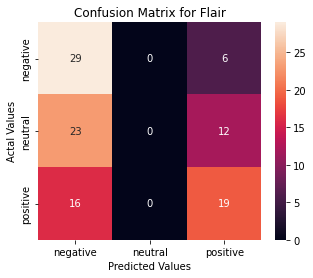

              precision    recall  f1-score   support

    negative       0.43      0.83      0.56        35
     neutral       0.00      0.00      0.00        35
    positive       0.51      0.54      0.53        35

    accuracy                           0.46       105
   macro avg       0.31      0.46      0.36       105
weighted avg       0.31      0.46      0.36       105

accuracy is 0.45714285714285713


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


('              precision    recall  f1-score   support\n\n    negative       0.43      0.83      0.56        35\n     neutral       0.00      0.00      0.00        35\n    positive       0.51      0.54      0.53        35\n\n    accuracy                           0.46       105\n   macro avg       0.31      0.46      0.36       105\nweighted avg       0.31      0.46      0.36       105\n',
 array([[29,  0,  6],
        [23,  0, 12],
        [16,  0, 19]]))

In [54]:
eval(df[real_score_name],df['flair_label'],'Flair')

<class 'list'>
<class 'list'>


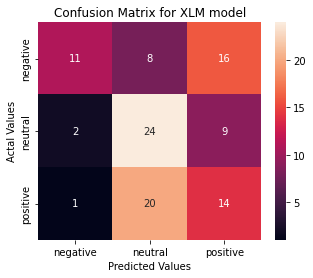

              precision    recall  f1-score   support

    negative       0.79      0.31      0.45        35
     neutral       0.46      0.69      0.55        35
    positive       0.36      0.40      0.38        35

    accuracy                           0.47       105
   macro avg       0.54      0.47      0.46       105
weighted avg       0.54      0.47      0.46       105

accuracy is 0.4666666666666667


('              precision    recall  f1-score   support\n\n    negative       0.79      0.31      0.45        35\n     neutral       0.46      0.69      0.55        35\n    positive       0.36      0.40      0.38        35\n\n    accuracy                           0.47       105\n   macro avg       0.54      0.47      0.46       105\nweighted avg       0.54      0.47      0.46       105\n',
 array([[11,  8, 16],
        [ 2, 24,  9],
        [ 1, 20, 14]]))

In [55]:
eval(df[real_score_name],df['xlm_model_score'],'XLM model')